In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import tensorflow_datasets as tfds

print(tf.__version__)

2.4.1


In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [5]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [9]:
history = model.fit(
    train_dataset,
    epochs = 10,
    validation_data = test_dataset
)

Epoch 1/10
391/391 [==============================] - 355s 903ms/step - loss: 0.6207 - accuracy: 0.6457 - val_loss: 0.6635 - val_accuracy: 0.6205
Epoch 2/10
391/391 [==============================] - 353s 902ms/step - loss: 0.6225 - accuracy: 0.6701 - val_loss: 0.5726 - val_accuracy: 0.7002
Epoch 3/10
391/391 [==============================] - 355s 909ms/step - loss: 0.4617 - accuracy: 0.7897 - val_loss: 0.4936 - val_accuracy: 0.7876
Epoch 4/10
391/391 [==============================] - 353s 903ms/step - loss: 0.3695 - accuracy: 0.8465 - val_loss: 0.5062 - val_accuracy: 0.7866
Epoch 5/10
391/391 [==============================] - 355s 908ms/step - loss: 0.3077 - accuracy: 0.8795 - val_loss: 0.4551 - val_accuracy: 0.7934
Epoch 6/10
391/391 [==============================] - 353s 903ms/step - loss: 0.2566 - accuracy: 0.9038 - val_loss: 0.4546 - val_accuracy: 0.8079
Epoch 7/10
391/391 [==============================] - 356s 912ms/step - loss: 0.2132 - accuracy: 0.9224 - val_loss: 0.4849 -

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])

    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])

    plt.show()

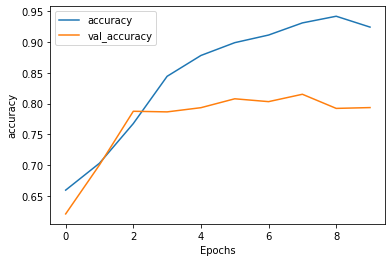

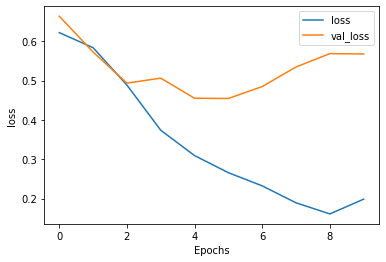

In [11]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')